In [ ]:
%tensorflow_version 2.x

In [ ]:
import tensorflow as tf
if tf.test.gpu_device_name():
  print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
  print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


In [ ]:
import numpy as np
import matplotlib.pylab as plt
import itertools
import sklearn
from sklearn import model_selection
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, learning_curve, GridSearchCV
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import keras
from keras import backend as K
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential, model_from_json
from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPool2D, MaxPooling2D
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/gDrive')

Mounted at /gDrive


In [ ]:
X = np.load('/gDrive/My Drive/breast_cancer_images/X.npy') # images
Y = np.load('/gDrive/My Drive/breast_cancer_images/Y.npy') # labels associated to images (0 = no IDC, 1 = IDC)

In [ ]:
print(X.shape)
print(Y.shape)

(5547, 50, 50, 3)
(5547,)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)#encore faire split parmi les 80% pour garder ces 20% en test set
"""X_train = X_train[0:30000] 
Y_train = Y_train[0:30000]
X_test = X_test[0:30000] 
Y_test = Y_test[0:30000]"""
X_train = X_train / 256.0
X_test = X_test / 256.0

print("Training Data Shape:", X_train.shape, Y_train.shape)
print("Testing Data Shape:", X_test.shape, Y_test.shape)

Training Data Shape: (4437, 50, 50, 3) (4437,)
Testing Data Shape: (1110, 50, 50, 3) (1110,)


In [ ]:
Y_train = to_categorical(Y_train, num_classes = 2)
Y_test = to_categorical(Y_test, num_classes = 2)
print("Training Data Shape:", X_train.shape, Y_train.shape)
print("Testing Data Shape:", X_test.shape, Y_test.shape)

Training Data Shape: (4437, 50, 50, 3) (4437, 2)
Testing Data Shape: (1110, 50, 50, 3) (1110, 2)


In [ ]:
Y_train = Y_train.astype('float32')
Y_test = Y_test.astype('float32')
X_test = X_test.astype('float32') #remplacer , par 1
X_train = X_train.astype('float32')
print("Training Data Shape:", X_train.shape, Y_train.shape)
print("Testing Data Shape:", X_test.shape, Y_test.shape)

Training Data Shape: (4437, 50, 50, 3) (4437, 2)
Testing Data Shape: (1110, 50, 50, 3) (1110, 2)


In [ ]:
img_rows, img_cols = X_train.shape[1],X_train.shape[2]
model = Sequential()
model.add(Conv2D(32,kernel_size=3,activation='relu'))
model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])



In [ ]:
model.fit(X_train,Y_train,epochs=12,validation_data=(X_test,Y_test))

In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=3,activation='relu'))
model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#Classification
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
history = model.fit(X_train,Y_train,epochs=15,validation_data=(X_test,Y_test))


Epoch 1/15
139/139 [==============================] - 32s 20ms/step - loss: 0.6978 - accuracy: 0.5310 - val_loss: 0.6726 - val_accuracy: 0.5135
Epoch 2/15
139/139 [==============================] - 2s 14ms/step - loss: 0.6519 - accuracy: 0.6361 - val_loss: 0.6366 - val_accuracy: 0.6514
Epoch 3/15
139/139 [==============================] - 2s 14ms/step - loss: 0.6163 - accuracy: 0.6725 - val_loss: 0.5880 - val_accuracy: 0.7009
Epoch 4/15
139/139 [==============================] - 2s 15ms/step - loss: 0.5845 - accuracy: 0.6952 - val_loss: 0.6236 - val_accuracy: 0.6613
Epoch 5/15
139/139 [==============================] - 2s 14ms/step - loss: 0.5817 - accuracy: 0.7009 - val_loss: 0.5626 - val_accuracy: 0.7288
Epoch 6/15
139/139 [==============================] - 2s 15ms/step - loss: 0.5623 - accuracy: 0.7260 - val_loss: 0.5432 - val_accuracy: 0.7459
Epoch 7/15
139/139 [==============================] - 2s 15ms/step - loss: 0.5603 - accuracy: 0.7190 - val_loss: 0.5942 - val_accuracy: 0.684

In [ ]:
# look at what you can access in the history, i.e. their keys (model.fit is a dict)
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


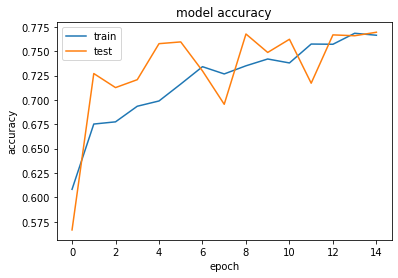

In [ ]:
# access the accuracy of the training test
plt.plot(history.history['accuracy'])
# access the accuracy of the test set
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# show the graph
plt.show()

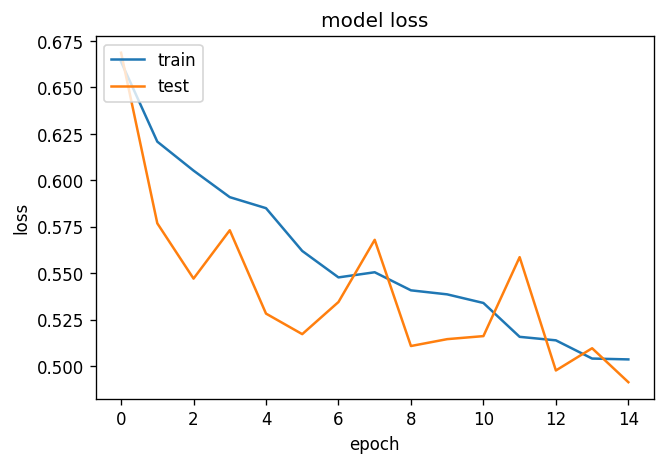

In [ ]:
# plot now the loss
fig, ax = plt.subplots(dpi=120)
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
""" https://github.com/HiYellowC/AggNet/blob/master/model.py"""

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(16, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(2))
model.add(Activation('softmax'))
optimizer = Adam(0.001, 0.9, 0.999, None)
model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])



In [ ]:
print(X_train.shape,Y_train.shape)
model.fit(X_train,Y_train,epochs=30,validation_data=(X_test,Y_test))

(4437, 50, 50, 3) (4437, 2)
Epoch 1/30
139/139 [==============================] - 2s 12ms/step - loss: 0.7342 - accuracy: 0.6929 - val_loss: 0.6414 - val_accuracy: 0.5919
Epoch 2/30
139/139 [==============================] - 1s 9ms/step - loss: 0.5186 - accuracy: 0.7582 - val_loss: 0.6074 - val_accuracy: 0.6631
Epoch 3/30
139/139 [==============================] - 1s 9ms/step - loss: 0.4713 - accuracy: 0.7889 - val_loss: 0.5725 - val_accuracy: 0.7162
Epoch 4/30
139/139 [==============================] - 1s 9ms/step - loss: 0.4777 - accuracy: 0.7875 - val_loss: 0.5617 - val_accuracy: 0.7234
Epoch 5/30
139/139 [==============================] - 1s 9ms/step - loss: 0.4654 - accuracy: 0.7845 - val_loss: 0.5273 - val_accuracy: 0.7532
Epoch 6/30
139/139 [==============================] - 1s 9ms/step - loss: 0.4396 - accuracy: 0.8054 - val_loss: 0.6708 - val_accuracy: 0.6595
Epoch 7/30
139/139 [==============================] - 1s 9ms/step - loss: 0.4356 - accuracy: 0.8033 - val_loss: 0.6840 

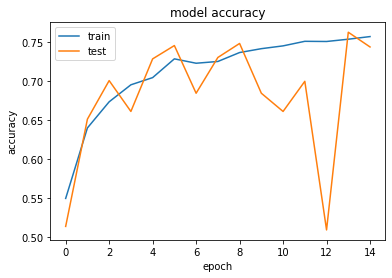

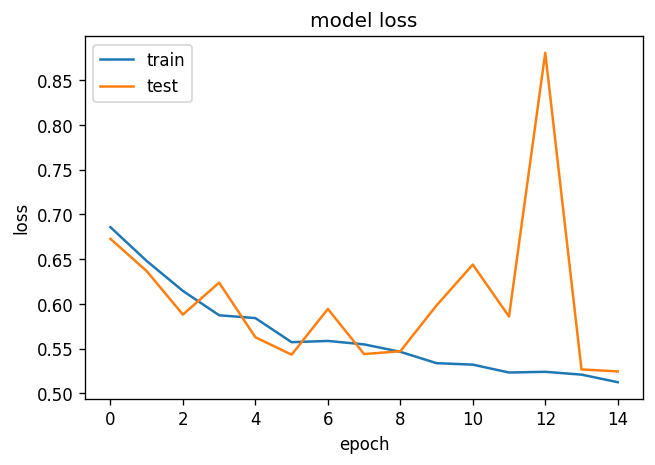

In [ ]:
# access the accuracy of the training test
plt.plot(history.history['accuracy'])
# access the accuracy of the test set
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plot now the loss
fig, ax = plt.subplots(dpi=120)
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.layers import Input


base_model = ResNet50(input_shape=X_train.shape[1:],weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(2, activation='softmax')(x)


# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional ResNet50 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])

#model.summary()


Model: "model_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_31 (InputLayer)           [(None, 50, 50, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 56, 56, 3)    0           input_31[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 25, 25, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 25, 25, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
model.fit(X_train,Y_train,epochs=30,validation_data=(X_test,Y_test))

Epoch 1/30
139/139 [==============================] - 11s 53ms/step - loss: 0.9786 - accuracy: 0.4926 - val_loss: 0.6893 - val_accuracy: 0.5162
Epoch 2/30
139/139 [==============================] - 6s 45ms/step - loss: 0.7211 - accuracy: 0.5393 - val_loss: 0.6934 - val_accuracy: 0.5036
Epoch 3/30
139/139 [==============================] - 6s 45ms/step - loss: 0.6933 - accuracy: 0.5425 - val_loss: 0.7570 - val_accuracy: 0.5054
Epoch 4/30
139/139 [==============================] - 6s 45ms/step - loss: 0.6845 - accuracy: 0.5639 - val_loss: 0.6650 - val_accuracy: 0.6171
Epoch 5/30
139/139 [==============================] - 6s 45ms/step - loss: 0.6732 - accuracy: 0.5728 - val_loss: 0.6573 - val_accuracy: 0.6315
Epoch 6/30
139/139 [==============================] - 6s 44ms/step - loss: 0.6593 - accuracy: 0.6069 - val_loss: 0.6721 - val_accuracy: 0.5568
Epoch 7/30
139/139 [==============================] - 6s 45ms/step - loss: 0.6497 - accuracy: 0.6173 - val_loss: 0.7274 - val_accuracy: 0.511

In [ ]:
# train the model on the new data for a few epochs
model.fit(...)

# at this point, the top layers are well trained and we can start fine-tuning
# convolutional layers from inception V3. We will freeze the bottom N layers
# and train the remaining top layers.

# let's visualize layer names and layer indices to see how many layers
# we should freeze:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True

# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy')

# we train our model again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense layers
model.fit(...)


In [ ]:
X_trainShape = X_train.shape[1]*X_train.shape[2]*X_train.shape[3]
X_testShape = X_test.shape[1]*X_test.shape[2]*X_test.shape[3]

X_trainFlat = X_train.reshape(X_train.shape[0], X_trainShape)
X_testFlat = X_test.reshape(X_test.shape[0], X_testShape)
print(X_trainShape)
print(X_testShape)
print(X_trainFlat)
print(X_testFlat)

7500
7500
[[0.92578125 0.90625    0.92578125 ... 0.63671875 0.48828125 0.62890625]
 [0.77734375 0.4453125  0.58984375 ... 0.80859375 0.35546875 0.52734375]
 [0.71484375 0.625      0.75390625 ... 0.60546875 0.47265625 0.6328125 ]
 ...
 [0.98046875 0.984375   0.984375   ... 0.8359375  0.78515625 0.88671875]
 [0.6796875  0.4296875  0.59765625 ... 0.58984375 0.20703125 0.3828125 ]
 [0.84375    0.5546875  0.6875     ... 0.80078125 0.69921875 0.80859375]]
[[0.8984375  0.72265625 0.78125    ... 0.921875   0.796875   0.85546875]
 [0.87109375 0.66796875 0.7578125  ... 0.86328125 0.82421875 0.859375  ]
 [0.56640625 0.41796875 0.4609375  ... 0.84765625 0.6015625  0.71484375]
 ...
 [0.95703125 0.94140625 0.93359375 ... 0.91796875 0.9140625  0.91796875]
 [0.828125   0.59375    0.703125   ... 0.5859375  0.3125     0.46484375]
 [0.8984375  0.8125     0.87109375 ... 0.65625    0.484375   0.65625   ]]


In [ ]:
from sklearn.svm import LinearSVC

knn = KNeighborsClassifier(n_neighbors=6)
#knn.fit(X_train,Y_train)